# Modelo de ML: teste de performance com ANN, RF e LogReg

## Configurações iniciais

In [258]:
# Importações de libraries importantes
import pandas as pd
import numpy as np
import seaborn as sbn
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

from sklearn.linear_model import LogisticRegression

from sklearn.ensemble import RandomForestClassifier

from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras import Sequential

In [259]:
train_df = pd.read_parquet("../data/processed/train_dataset.parquet")

pd.set_option('display.max_columns', None)

In [260]:
train_df.head()

,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),systolic,relaxation,fasting blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,serum creatinine,AST,ALT,Gtp,dental caries,smoking,hearing_left_1,hearing_left_2,hearing_right_1,hearing_right_2,urine_protein_1,urine_protein_2,urine_protein_3,urine_protein_4,urine_protein_5,urine_protein_6
0,0.230769,0.666667,0.523810,0.589744,0.081633,0.081633,0.290123,0.358491,0.135279,0.471795,0.146317,0.185915,0.075847,0.919753,0.078261,0.050738,0.039135,0.123370,1,1,1,0,1,0,1,0,0,0,0,0
1,0.000000,0.750000,0.761905,0.756410,0.061224,0.081633,0.296296,0.367925,0.111406,0.400000,0.121090,0.188732,0.060785,0.679012,0.086957,0.011993,0.008239,0.028084,1,0,1,0,1,0,1,0,0,0,0,0
2,0.384615,0.416667,0.333333,0.448718,0.081633,0.081633,0.240741,0.377358,0.090186,0.353846,0.113017,0.149296,0.059710,0.543210,0.043478,1.000000,0.480261,0.274824,0,0,1,0,1,0,0,0,1,0,0,0
3,0.384615,0.583333,0.476190,0.551282,0.071429,0.061224,0.537037,0.452830,0.538462,0.397436,0.361251,0.118310,0.048413,0.740741,0.069565,0.023985,0.012015,0.034102,0,0,1,0,1,0,1,0,0,0,0,0
4,0.000000,0.583333,0.285714,0.384615,0.142857,0.000000,0.234568,0.226415,0.143236,0.317949,0.193744,0.121127,0.048951,0.617284,0.095652,0.018450,0.009269,0.013039,0,0,1,0,1,0,1,0,0,0,0,0


## Train Test Split

In [261]:
features = list(train_df.columns.values)
features.remove("smoking")

X = train_df[features]
Y = train_df["smoking"]

In [262]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y)

In [263]:
X_train = X_train.values
Y_train = Y_train.values
X_test = X_test.values
Y_test = Y_test.values

# Modelo de ML 1: Rede Neural Artificial

## Configuração dos parâmetros do Modelo

In [238]:
modelo_ANN = Sequential([
    Flatten(input_shape=(29,)),
    Dense(64, activation=tf.nn.relu),
    Dense(64, activation=tf.nn.relu),
    Dense(64, activation=tf.nn.relu),
    Dense(64, activation=tf.nn.relu),
    Dense(64, activation=tf.nn.relu),
    Dense(1, activation=tf.nn.sigmoid),
])

In [239]:
modelo_ANN.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [240]:
modelo_ANN.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_11 (Flatten)        (None, 29)                0         
                                                                 
 dense_45 (Dense)            (None, 64)                1920      
                                                                 
 dense_46 (Dense)            (None, 64)                4160      
                                                                 
 dense_47 (Dense)            (None, 64)                4160      
                                                                 
 dense_48 (Dense)            (None, 64)                4160      
                                                                 
 dense_49 (Dense)            (None, 64)                4160      
                                                                 
 dense_50 (Dense)            (None, 1)               

In [221]:
fitted_model = modelo_ANN.fit(X_train, Y_train, epochs=500, batch_size=2)

Epoch 1/500
14619/14619 [==============================] - 16s 1ms/step - loss: 0.5259 - accuracy: 0.7116
Epoch 2/500
14619/14619 [==============================] - 16s 1ms/step - loss: 0.5060 - accuracy: 0.7263
Epoch 3/500
14619/14619 [==============================] - 18s 1ms/step - loss: 0.5027 - accuracy: 0.7259
Epoch 4/500
14619/14619 [==============================] - 17s 1ms/step - loss: 0.4992 - accuracy: 0.7310
Epoch 5/500
14619/14619 [==============================] - 15s 995us/step - loss: 0.4973 - accuracy: 0.7310
Epoch 6/500
14619/14619 [==============================] - 19s 1ms/step - loss: 0.4945 - accuracy: 0.7338
Epoch 7/500
14619/14619 [==============================] - 20s 1ms/step - loss: 0.4935 - accuracy: 0.7368
Epoch 8/500
14619/14619 [==============================] - 20s 1ms/step - loss: 0.4920 - accuracy: 0.7392
Epoch 9/500
14619/14619 [==============================] - 18s 1ms/step - loss: 0.4919 - accuracy: 0.7389
Epoch 10/500
14619/14619 [==================

14619/14619 [==============================] - 15s 1ms/step - loss: 0.4689 - accuracy: 0.7572
Epoch 78/500
14619/14619 [==============================] - 16s 1ms/step - loss: 0.4679 - accuracy: 0.7574
Epoch 79/500
14619/14619 [==============================] - 15s 1ms/step - loss: 0.4665 - accuracy: 0.7560
Epoch 80/500
14619/14619 [==============================] - 17s 1ms/step - loss: 0.4682 - accuracy: 0.7554
Epoch 81/500
14619/14619 [==============================] - 16s 1ms/step - loss: 0.4660 - accuracy: 0.7580
Epoch 82/500
14619/14619 [==============================] - 17s 1ms/step - loss: 0.4680 - accuracy: 0.7551
Epoch 83/500
14619/14619 [==============================] - 18s 1ms/step - loss: 0.4661 - accuracy: 0.7577
Epoch 84/500
14619/14619 [==============================] - 18s 1ms/step - loss: 0.4677 - accuracy: 0.7572
Epoch 85/500
14619/14619 [==============================] - 17s 1ms/step - loss: 0.4673 - accuracy: 0.7558
Epoch 86/500
14619/14619 [========================

14619/14619 [==============================] - 16s 1ms/step - loss: 0.4665 - accuracy: 0.7599
Epoch 154/500
14619/14619 [==============================] - 15s 1ms/step - loss: 0.4741 - accuracy: 0.7582
Epoch 155/500
14619/14619 [==============================] - 15s 1ms/step - loss: 0.4672 - accuracy: 0.7572
Epoch 156/500
14619/14619 [==============================] - 16s 1ms/step - loss: 0.4718 - accuracy: 0.7572
Epoch 157/500
14619/14619 [==============================] - 16s 1ms/step - loss: 0.4693 - accuracy: 0.7577
Epoch 158/500
14619/14619 [==============================] - 16s 1ms/step - loss: 0.4665 - accuracy: 0.7578
Epoch 159/500
14619/14619 [==============================] - 15s 1ms/step - loss: 0.4645 - accuracy: 0.7581
Epoch 160/500
14619/14619 [==============================] - 17s 1ms/step - loss: 0.4714 - accuracy: 0.7568
Epoch 161/500
14619/14619 [==============================] - 15s 1ms/step - loss: 0.4652 - accuracy: 0.7575
Epoch 162/500
14619/14619 [===============

14619/14619 [==============================] - 14s 983us/step - loss: 0.4706 - accuracy: 0.7593
Epoch 229/500
14619/14619 [==============================] - 15s 994us/step - loss: 0.4625 - accuracy: 0.7613
Epoch 230/500
14619/14619 [==============================] - 15s 995us/step - loss: 0.4703 - accuracy: 0.7584
Epoch 231/500
14619/14619 [==============================] - 15s 1ms/step - loss: 0.4637 - accuracy: 0.7579
Epoch 232/500
14619/14619 [==============================] - 16s 1ms/step - loss: 0.4654 - accuracy: 0.7605
Epoch 233/500
14619/14619 [==============================] - 15s 1ms/step - loss: 0.4680 - accuracy: 0.7596
Epoch 234/500
14619/14619 [==============================] - 15s 1ms/step - loss: 0.4626 - accuracy: 0.7600
Epoch 235/500
14619/14619 [==============================] - 15s 1000us/step - loss: 0.4600 - accuracy: 0.7607
Epoch 236/500
14619/14619 [==============================] - 14s 987us/step - loss: 0.4778 - accuracy: 0.7612
Epoch 237/500
14619/14619 [====

14619/14619 [==============================] - 14s 991us/step - loss: 0.4650 - accuracy: 0.7630
Epoch 304/500
14619/14619 [==============================] - 15s 1ms/step - loss: 0.4697 - accuracy: 0.7596
Epoch 305/500
14619/14619 [==============================] - 14s 956us/step - loss: 0.4650 - accuracy: 0.7599
Epoch 306/500
14619/14619 [==============================] - 14s 948us/step - loss: 0.4643 - accuracy: 0.7628
Epoch 307/500
14619/14619 [==============================] - 14s 957us/step - loss: 0.4644 - accuracy: 0.7603
Epoch 308/500
14619/14619 [==============================] - 14s 964us/step - loss: 0.4631 - accuracy: 0.7582
Epoch 309/500
14619/14619 [==============================] - 14s 952us/step - loss: 0.4681 - accuracy: 0.7609
Epoch 310/500
14619/14619 [==============================] - 14s 954us/step - loss: 0.4647 - accuracy: 0.7603
Epoch 311/500
14619/14619 [==============================] - 14s 980us/step - loss: 0.4622 - accuracy: 0.7599
Epoch 312/500
14619/14619 

14619/14619 [==============================] - 15s 1ms/step - loss: 0.4746 - accuracy: 0.7572
Epoch 379/500
14619/14619 [==============================] - 15s 1ms/step - loss: 0.4623 - accuracy: 0.7618
Epoch 380/500
14619/14619 [==============================] - 15s 1ms/step - loss: 0.4744 - accuracy: 0.7613
Epoch 381/500
14619/14619 [==============================] - 15s 1ms/step - loss: 0.4725 - accuracy: 0.7580
Epoch 382/500
14619/14619 [==============================] - 15s 1ms/step - loss: 0.4828 - accuracy: 0.7593
Epoch 383/500
14619/14619 [==============================] - 16s 1ms/step - loss: 0.4746 - accuracy: 0.7536
Epoch 384/500
14619/14619 [==============================] - 17s 1ms/step - loss: 0.4781 - accuracy: 0.7584
Epoch 385/500
14619/14619 [==============================] - 1468s 100ms/step - loss: 0.4665 - accuracy: 0.7616
Epoch 386/500
14619/14619 [==============================] - 23s 2ms/step - loss: 0.4735 - accuracy: 0.7603
Epoch 387/500
14619/14619 [===========

14619/14619 [==============================] - 15s 1ms/step - loss: 0.4730 - accuracy: 0.7583
Epoch 454/500
14619/14619 [==============================] - 15s 1ms/step - loss: 0.4686 - accuracy: 0.7628
Epoch 455/500
14619/14619 [==============================] - 15s 1ms/step - loss: 0.4721 - accuracy: 0.7591
Epoch 456/500
14619/14619 [==============================] - 15s 1ms/step - loss: 0.4685 - accuracy: 0.7602
Epoch 457/500
14619/14619 [==============================] - 15s 1ms/step - loss: 0.4748 - accuracy: 0.7583
Epoch 458/500
14619/14619 [==============================] - 15s 1ms/step - loss: 0.4641 - accuracy: 0.7610
Epoch 459/500
14619/14619 [==============================] - 15s 1ms/step - loss: 0.4687 - accuracy: 0.7620
Epoch 460/500
14619/14619 [==============================] - 15s 1ms/step - loss: 0.4674 - accuracy: 0.7614
Epoch 461/500
14619/14619 [==============================] - 16s 1ms/step - loss: 0.4899 - accuracy: 0.7624
Epoch 462/500
14619/14619 [===============

## Performance do Modelo

<AxesSubplot:>

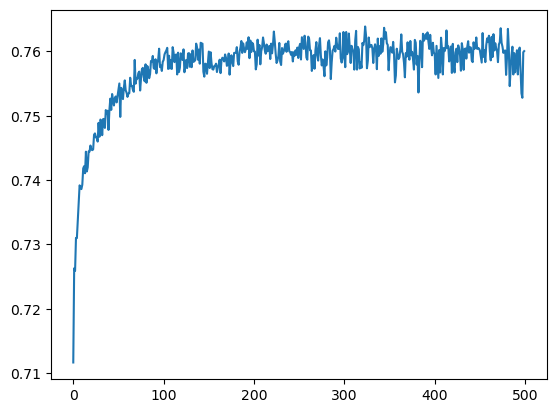

In [236]:
sbn.lineplot(data=fitted_model.history["accuracy"])

In [222]:
ANN_pred = modelo_ANN.predict(X_test)

305/305 [==============================] - 1s 1ms/step


In [223]:
ANN_pred

array([[0.7076152 ],
       [0.3466517 ],
       [0.65573984],
       ...,
       [0.7076152 ],
       [0.32828623],
       [0.5672835 ]], dtype=float32)

In [224]:
Y_test

37981    1
37661    0
1623     1
9687     1
18181    1
        ..
26163    0
7678     0
2418     1
30505    0
13128    0
Name: smoking, Length: 9746, dtype: int64

In [226]:
ANN_pred = np.array(list(map(lambda x: 1 if x > 0.5 else 0, ANN_pred)))

In [227]:
Y_test = np.array(Y_test)
Y_test

array([1, 0, 1, ..., 1, 0, 0], dtype=int64)

In [228]:
ANN_pred

array([1, 0, 1, ..., 1, 0, 1])

In [229]:
accuracy_score(Y_test, ANN_pred)

0.7472809357685204

In [230]:
print(classification_report(Y_test, ANN_pred))

              precision    recall  f1-score   support

           0       0.84      0.74      0.79      6102
           1       0.63      0.76      0.69      3644

    accuracy                           0.75      9746
   macro avg       0.74      0.75      0.74      9746
weighted avg       0.76      0.75      0.75      9746



## Serialização do Modelo

In [232]:
import pickle

In [234]:
pickle.dump(fitted_model, open('../models/ANN_model.pkl', 'wb'))

Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers\dense
......vars
.........0
.........1
...layers\dense_1
......vars
.........0
.........1
...layers\dense_2
......vars
.........0
.........1
...layers\dense_3
......vars
.........0
.........1
...layers\dense_4
......vars
.........0
.........1
...layers\dense_5
......vars
.........0
.........1
...layers\flatten
......vars
...metrics\mean
......vars
.........0
.........1
...metrics\mean_metric_wrapper
......vars
.........0
.........1
...optimizer
......vars
.........0
.........1
.........10
.........11
.........12
.........13
.........14
.........15
.........16
.........17
.........18
.........19
.........2
.........20
.........21
.........22
.........23
.........24
.........3
.........4
.........5
.........6
.........7
.........8
.........9
...vars
Keras model archive saving:
File Name                                             Modified             Size
config.json                                    2023-02-14 

# Modelo de ML 2: Random Forest

## Configuração dos parâmetros do Modelo

In [290]:
# Parâmetros
criterion_RF = ['gini', 'entropy']
n_estimators = 48 
min_samples_split = 4
min_samples_leaf = 2
random_state = 3422
verbose = 3

In [291]:
modelo_RF = RandomForestClassifier(criterion=criterion_RF[1], n_estimators=n_estimators, 
                                   min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf, 
                                   random_state=random_state, verbose=verbose)

In [292]:
modelo_RF.fit(X_train, Y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 48
building tree 2 of 48
building tree 3 of 48
building tree 4 of 48
building tree 5 of 48
building tree 6 of 48
building tree 7 of 48
building tree 8 of 48
building tree 9 of 48
building tree 10 of 48
building tree 11 of 48
building tree 12 of 48
building tree 13 of 48
building tree 14 of 48
building tree 15 of 48
building tree 16 of 48
building tree 17 of 48
building tree 18 of 48
building tree 19 of 48
building tree 20 of 48
building tree 21 of 48
building tree 22 of 48
building tree 23 of 48
building tree 24 of 48
building tree 25 of 48
building tree 26 of 48
building tree 27 of 48
building tree 28 of 48
building tree 29 of 48
building tree 30 of 48
building tree 31 of 48
building tree 32 of 48
building tree 33 of 48
building tree 34 of 48
building tree 35 of 48
building tree 36 of 48
building tree 37 of 48
building tree 38 of 48
building tree 39 of 48
building tree 40 of 48
building tree 41 of 48
building tree 42 of 48
building tree 43 of 48
building tree 44 of 

[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:    3.1s finished


RandomForestClassifier(criterion='entropy', min_samples_leaf=2,
                       min_samples_split=4, n_estimators=48, random_state=3422,
                       verbose=3)

## Performance do Modelo

In [293]:
RF_pred = modelo_RF.predict(X_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:    0.0s finished


In [294]:
RF_pred

array([1, 0, 1, ..., 0, 1, 0], dtype=int64)

In [295]:
Y_test

array([1, 0, 1, ..., 0, 1, 0], dtype=int64)

In [296]:
accuracy_score(Y_test, RF_pred)

0.8027908885696696

In [297]:
print(classification_report(Y_test, RF_pred))

              precision    recall  f1-score   support

           0       0.84      0.86      0.85      6165
           1       0.74      0.71      0.73      3581

    accuracy                           0.80      9746
   macro avg       0.79      0.78      0.79      9746
weighted avg       0.80      0.80      0.80      9746



## Serialização do Modelo

In [298]:
pickle.dump(modelo_RF, open('../models/RF_model.pkl', 'wb'))

# Modelo de ML 3: Logistic Regression

# Análise dos Modelos: accuracy, recall e training time.